### Data in Motion Weekly Challenge on Analysing Best Sellers with Python

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales_data = pd.read_csv('bestsellers with categories.csv')
sales_data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### checking missing data in the dataset

In [3]:
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre


There is no missing data in the dataset

In [4]:
#checking duplicates in the dataset
sales_data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool>

The duplicated function returns false which means there are no duplicates in our sales data

### Checking for spelling errors in the Name column

In [5]:
#sales_data['Name'].unique()

In [6]:
#sales_data['Author'].unique()

In [7]:
sales_data['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [8]:
pd.set_option("display.max_rows",100)
print(sales_data.Author.value_counts())

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64


In [9]:
#grouping the the Authors and getting the sum of the ratings for every Author
author_ratings = sales_data.groupby('Author')['User Rating'].sum().reset_index()

In [10]:
author_ratings_sorted = author_ratings.sort_values(by='User Rating', ascending=False)

In [11]:
#listing the top 10 authors by the User Ratings
top_10_authors = author_ratings_sorted.head(10)
top_10_authors


,Author,User Rating
120,Jeff Kinney,57.6
197,Rick Riordan,52.5
92,Gary Chapman,52.1
226,Suzanne Collins,51.3
11,American Psychological Association,45.0
73,Dr. Seuss,43.9
199,Rob Elliott,36.5
90,Gallup,36.0
58,Dav Pilkey,34.3
83,Eric Carle,34.3


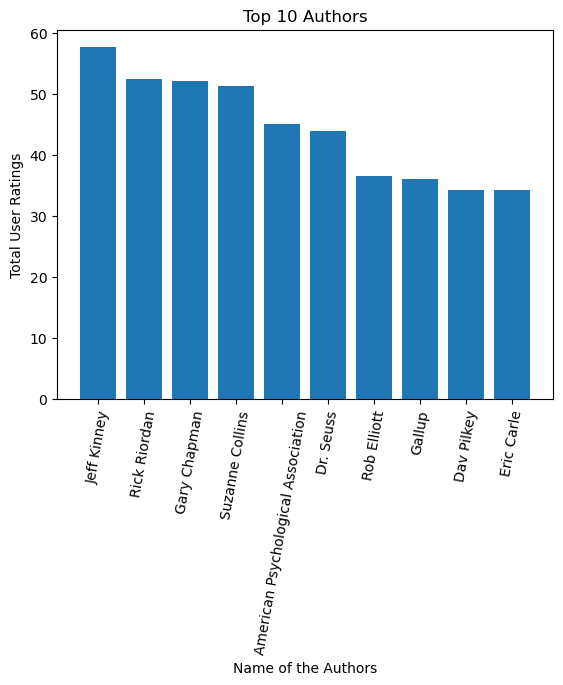

In [12]:
plt.bar(top_10_authors['Author'],top_10_authors['User Rating'])
plt.xticks(rotation = 80)
plt.title('Top 10 Authors')
plt.ylabel('Total User Ratings')
plt.xlabel('Name of the Authors')
plt.show()

In [13]:
sales_data['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [14]:
#calculating the genres counts and getting the percentages
counts = sales_data.Genre.value_counts()

books_by_genres_perce = sales_data.Genre.value_counts(normalize=True)

books_by_genres = pd.concat([counts,books_by_genres_perce], axis=1, keys=['counts','books_by_genres_perce'])
books_by_genres

,counts,books_by_genres_perce
Non Fiction,310,0.563636
Fiction,240,0.436364


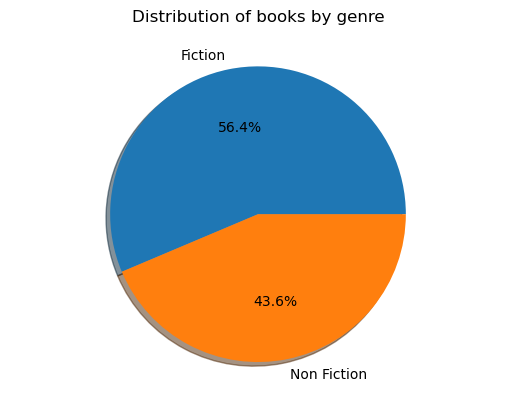

In [15]:
plt.axis('equal')
plt.pie(books_by_genres_perce,labels=['Fiction','Non Fiction'],autopct='%1.1f%%',shadow=True)
plt.title('Distribution of books by genre')
plt.show()

### Top 5 books by number of reviews.

In [16]:
books_review_sorted= sales_data.sort_values(by='Reviews', ascending=False)
top5_books_sorted=books_review_sorted.head(5)
data= top5_books_sorted
data

#filtered_df = sales_data.groupby(['Author', 'Name', 'Reviews']).filter(lambda x: len(x['Year'].unique()) > 1)
#filtered_df.head().sort_values(by='Reviews', ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction


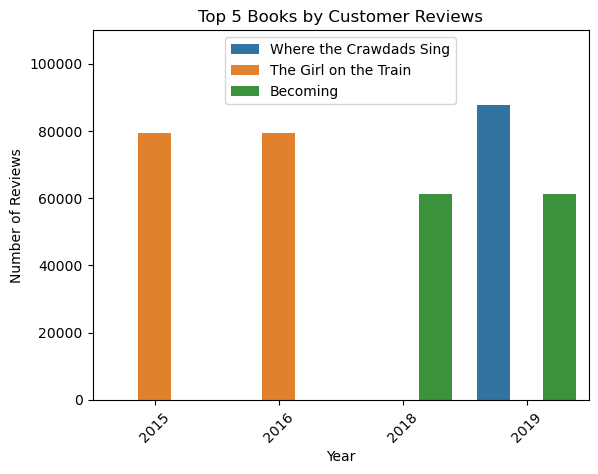

In [17]:
sns.barplot(x='Year', y='Reviews', hue='Name', data=top5_books_sorted)

plt.ylim(0, 110000)
plt.title('Top 5 Books by Customer Reviews')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper center')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

plt.show()

### Outliers in the Dataset

In [18]:
sales_data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [19]:
#dropping the columns
data_f = sales_data.drop(columns=['Name','Author','Genre'])
data_f

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [20]:
data_f.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


After running the describe function in aour data set after dropping some columns we notinc that minimum price for a book is 0.This shows that in the price column we have zero values in the price column.

### The correlation between User Ratings and customer reviews.

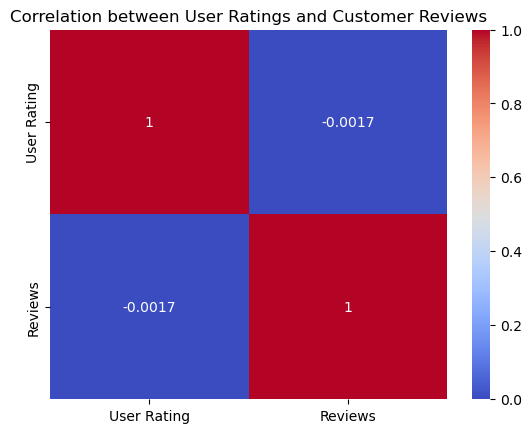

In [21]:
sales_data_corr = sales_data[['User Rating', 'Reviews']].corr()

sns.heatmap(sales_data_corr, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation between User Ratings and Customer Reviews')

# Display the plot
plt.show()